In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/layoffs-data-2022/layoffs_data.csv


In [2]:
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('png', 'pdf')
from IPython.display import Image

/tmp/ipykernel_20/125573723.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png', 'pdf')


In [3]:
Image(url='https://a57.foxnews.com/static.foxbusiness.com/foxbusiness.com/content/uploads/2022/12/0/0/Business-Layoffs.jpg?ve=1&tl=1',width=1500
      , height=500)

### 1. Importing the Necessary Libraries

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### 2. Reading CSV File

In [5]:
df = pd.read_csv("/kaggle/input/layoffs-data-2022/layoffs_data.csv")

In [6]:
# Getting all the columns of a dataset
df.columns

Index(['Company', 'Location_HQ', 'Industry', 'Percentage', 'Date', 'Source',
       'Funds_Raised', 'Stage', 'Date_Added', 'Country', 'Laid_Off_Count',
       'List_of_Employees_Laid_Off'],
      dtype='object')

### 3. Data Cleaning

In [7]:
# Dropping off the Un-Necessary columns from dataset 
df1 = df.drop(['Source','Date_Added','List_of_Employees_Laid_Off'], axis=1)

### 4. Data Exploration

In [8]:
# Fetching basic info about the dataset 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2738 entries, 0 to 2737
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         2738 non-null   object 
 1   Location_HQ     2738 non-null   object 
 2   Industry        2738 non-null   object 
 3   Percentage      1819 non-null   float64
 4   Date            2738 non-null   object 
 5   Funds_Raised    2466 non-null   float64
 6   Stage           2738 non-null   object 
 7   Country         2738 non-null   object 
 8   Laid_Off_Count  1871 non-null   float64
dtypes: float64(3), object(6)
memory usage: 192.6+ KB


In [9]:
# Basic Stats of the data 

df1.describe()

,Percentage,Funds_Raised,Laid_Off_Count
count,1819.000000,2466.000000,1871.000000
mean,0.265282,805.994118,252.405665
std,0.265125,5295.209903,818.989438
min,0.000000,0.000000,3.000000
25%,0.100000,50.000000,40.000000
50%,0.170000,157.000000,80.000000
75%,0.300000,445.000000,180.000000
max,1.000000,121900.000000,12000.000000


In [10]:
# Dropping off the null values in the dataset 
df1.dropna(inplace = True)

In [11]:
# Fetching the duplicated row count in the dataset 
df1.duplicated().sum()

1

In [12]:
# Dropping off the duplicates values from dataset 
df1.drop_duplicates(inplace = True)

### 5. Feature Engineering

In [13]:
df1.insert(9, 'strength',np.nan)

In [14]:
# Calculating the strength of the employees and appending the values in strength Column
for i in df1.index:
    df1["strength"][i] = (round((100/(df1["Percentage"][i])*df1["Laid_Off_Count"][i]),0))
df1 

,Company,Location_HQ,Industry,Percentage,Date,Funds_Raised,Stage,Country,Laid_Off_Count,strength
5,Ritual,Toronto,Food,0.40,2023-06-21,134.0,Series C,Canada,38.0,9500.0
7,Grab,Singapore,Transportation,0.11,2023-06-20,16500.0,Post-IPO,Singapore,1000.0,909091.0
10,Chigari,Bengaluru,Media,0.20,2023-06-19,88.0,Unknown,India,48.0,24000.0
13,Mojocare,Bengaluru,Healthcare,0.80,2023-06-17,24.0,Series A,India,170.0,21250.0
17,CareRev,Los Angeles,Healthcare,0.33,2023-06-15,51.0,Series A,United States,100.0,30303.0
...,...,...,...,...,...,...,...,...,...,...
2731,Inspirato,Denver,Travel,0.22,2020-03-16,79.0,Series C,United States,130.0,59091.0
2732,Help.com,Austin,Support,1.00,2020-03-16,6.0,Seed,United States,16.0,1600.0
2734,HopSkipDrive,Los Angeles,Transportation,0.10,2020-03-13,45.0,Unknown,United States,8.0,8000.0
2735,Panda Squad,SF Bay Area,Consumer,0.75,2020-03-13,1.0,Seed,United States,6.0,800.0


### 5. Conducting Data Analysis

In [15]:
# Fetching the necessary columns for correlation matrix
df2 = df1.copy()
df2 = df2.select_dtypes(exclude = ["object"])

In [16]:
df2.corr()

,Percentage,Funds_Raised,Laid_Off_Count,strength
Percentage,1.000000,-0.065497,-0.035630,-0.106831
Funds_Raised,-0.065497,1.000000,0.105104,0.053467
Laid_Off_Count,-0.035630,0.105104,1.000000,0.780326
strength,-0.106831,0.053467,0.780326,1.000000


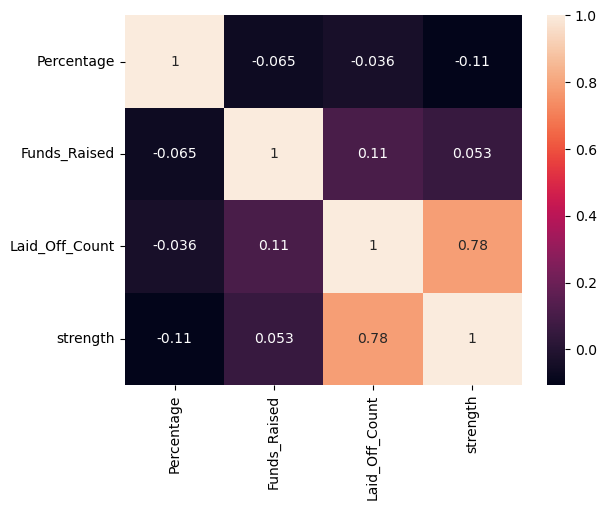

In [17]:
# Correlation matrix heatmap 
ax = sns.heatmap(df2.corr(),annot = True)

In [18]:
# Resetting the index of the records 
df1.reset_index(inplace = True )

In [19]:
# Separating the Year , Month and Quarter from dates in variables   

df1['Date'] = pd.to_datetime(df1['Date'])
df1['Year'] = df1['Date'].dt.year
df1['Month'] = df1['Date'].dt.month_name()
df1['Quarters'] = df1['Date'].dt.to_period('Q')

In [20]:
df1

,index,Company,Location_HQ,Industry,Percentage,Date,Funds_Raised,Stage,Country,Laid_Off_Count,strength,Year,Month,Quarters
0,5,Ritual,Toronto,Food,0.40,2023-06-21,134.0,Series C,Canada,38.0,9500.0,2023,June,2023Q2
1,7,Grab,Singapore,Transportation,0.11,2023-06-20,16500.0,Post-IPO,Singapore,1000.0,909091.0,2023,June,2023Q2
2,10,Chigari,Bengaluru,Media,0.20,2023-06-19,88.0,Unknown,India,48.0,24000.0,2023,June,2023Q2
3,13,Mojocare,Bengaluru,Healthcare,0.80,2023-06-17,24.0,Series A,India,170.0,21250.0,2023,June,2023Q2
4,17,CareRev,Los Angeles,Healthcare,0.33,2023-06-15,51.0,Series A,United States,100.0,30303.0,2023,June,2023Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237,2731,Inspirato,Denver,Travel,0.22,2020-03-16,79.0,Series C,United States,130.0,59091.0,2020,March,2020Q1
1238,2732,Help.com,Austin,Support,1.00,2020-03-16,6.0,Seed,United States,16.0,1600.0,2020,March,2020Q1
1239,2734,HopSkipDrive,Los Angeles,Transportation,0.10,2020-03-13,45.0,Unknown,United States,8.0,8000.0,2020,March,2020Q1
1240,2735,Panda Squad,SF Bay Area,Consumer,0.75,2020-03-13,1.0,Seed,United States,6.0,800.0,2020,March,2020Q1


# Generating the Significant Insights from Data

### 1. Top 10 Industries LaidOff Employees and Top 10 Employees Laid Off Percentage

In [21]:
df1["Industry"].unique()

array(['Food', 'Transportation', 'Media', 'Healthcare', 'Crypto',
       'Consumer', 'Product', 'Education', 'Security', 'Sales',
       'Infrastructure', 'Marketing', 'Support', 'Recruiting', 'Other',
       'Finance', 'Logistics', 'Hardware', 'Retail', 'Travel', 'Data',
       'HR', 'Real Estate', 'Energy', 'Fitness', 'Legal', 'Manufacturing',
       'Construction', 'Aerospace'], dtype=object)

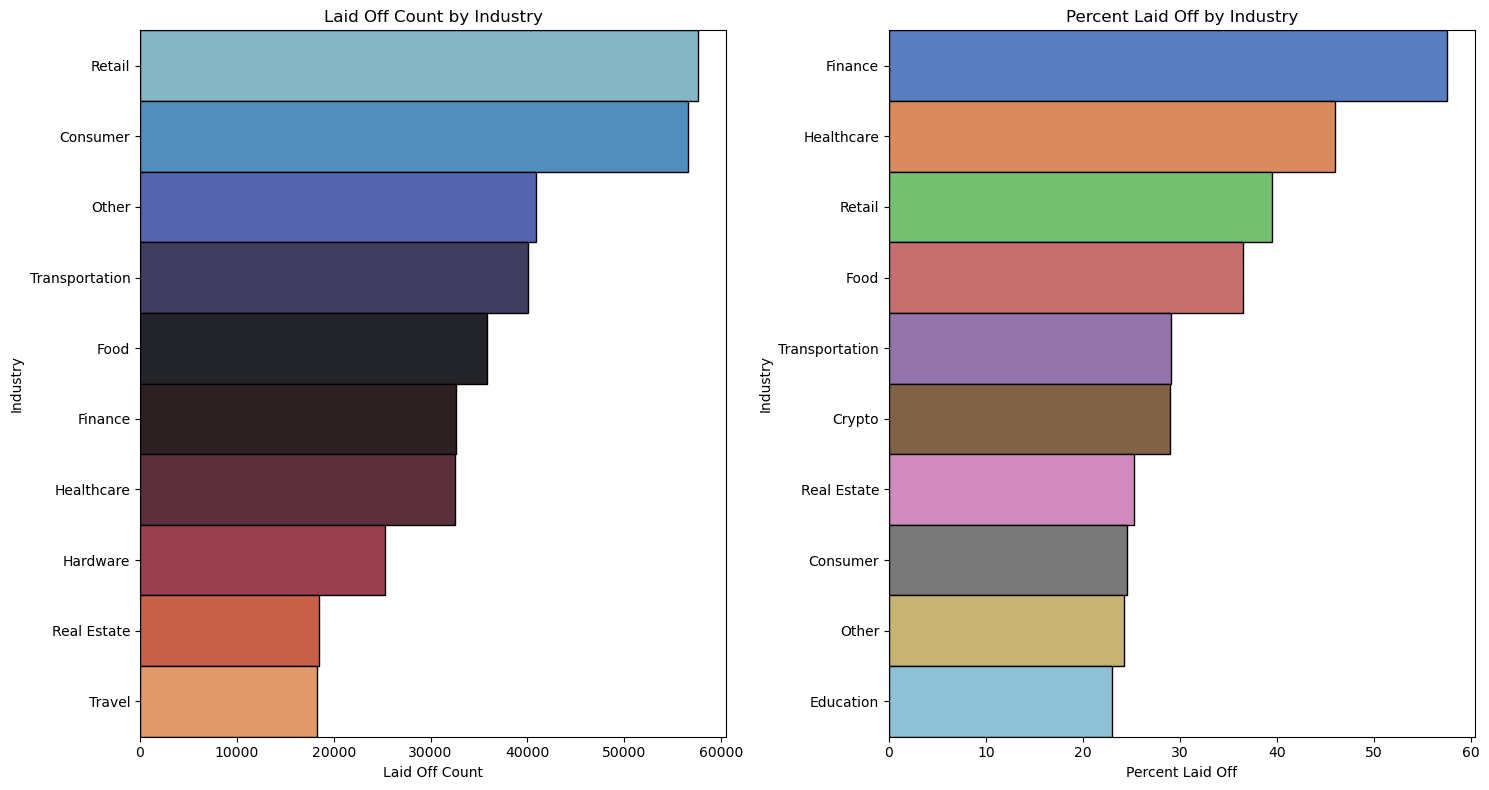

In [22]:
fig, ax = plt.subplots(1, 2,figsize=(15,8))

ax[0] = sns.barplot(data=df.groupby('Industry')['Laid_Off_Count'].sum().sort_values(ascending=False).reset_index().head(10), 
            y='Industry', x='Laid_Off_Count', errorbar=None, width=1, edgecolor='black',dodge = True ,palette='icefire', ax=ax[0])
ax[0].set(title='Laid Off Count by Industry', xlabel='Laid Off Count')

ax[1] = sns.barplot(data=df.groupby('Industry')['Percentage'].sum().sort_values(ascending=False).reset_index().head(10), 
            y='Industry', x='Percentage', errorbar=None, width=1, edgecolor='black', palette='muted', ax=ax[1])
ax[1].set(title='Percent Laid Off by Industry', xlabel='Percent Laid Off')

plt.tight_layout()
fig.show()

### 2. Laid Off Year vs Employees Laid Off Count

In [23]:
df1["Year"].unique()

array([2023, 2022, 2021, 2020])

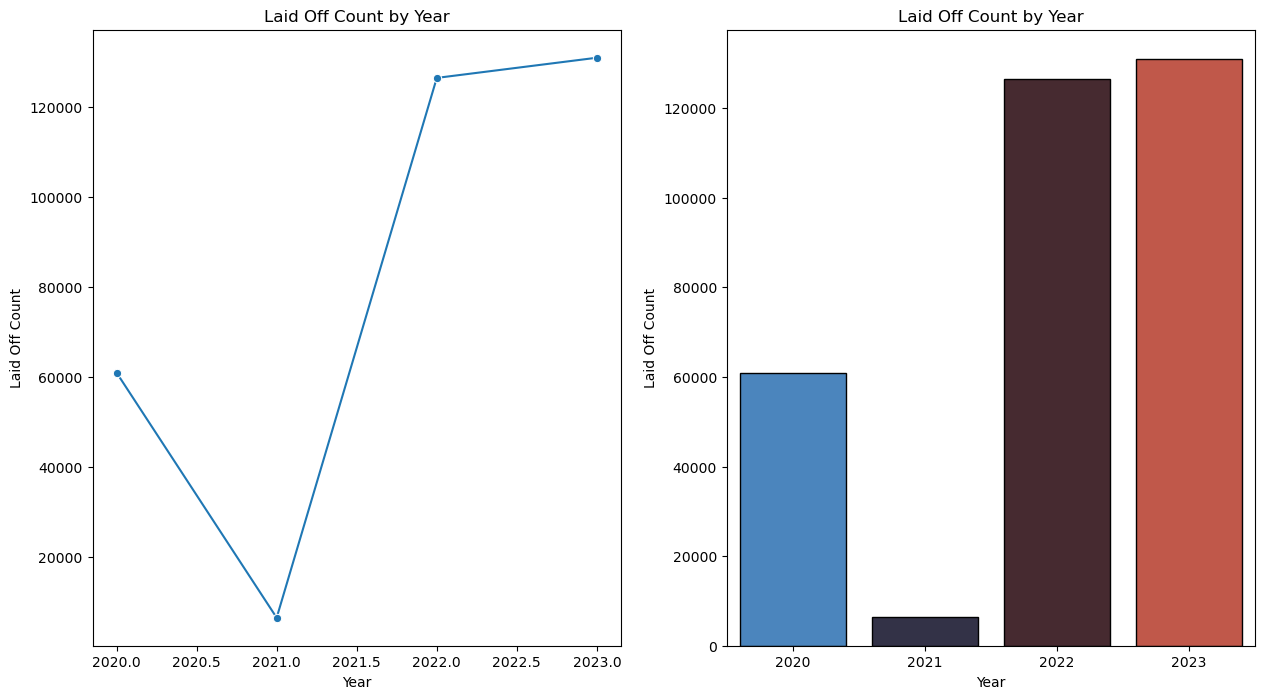

In [24]:
fig, ax = plt.subplots(1,2, figsize=(15,8))
ax[0] = sns.lineplot(data=df1.groupby('Year')['Laid_Off_Count'].sum().reset_index(), x='Year', y='Laid_Off_Count', 
                  errorbar=None, marker='o', ax=ax[0])
ax[0].set(title='Laid Off Count by Year', xlabel ="Year",  ylabel='Laid Off Count')


ax[1] = sns.barplot(data=df1.groupby('Year')['Laid_Off_Count'].sum().reset_index(), x='Year', y='Laid_Off_Count', 
                  errorbar=None, ax=ax[1], palette='icefire', linewidth=1,edgecolor='black')
ax[1].set(title='Laid Off Count by Year', xlabel = "Year" ,ylabel='Laid Off Count')


fig.show()

### 3. Laid Off Month vs Employees Laid Off Count

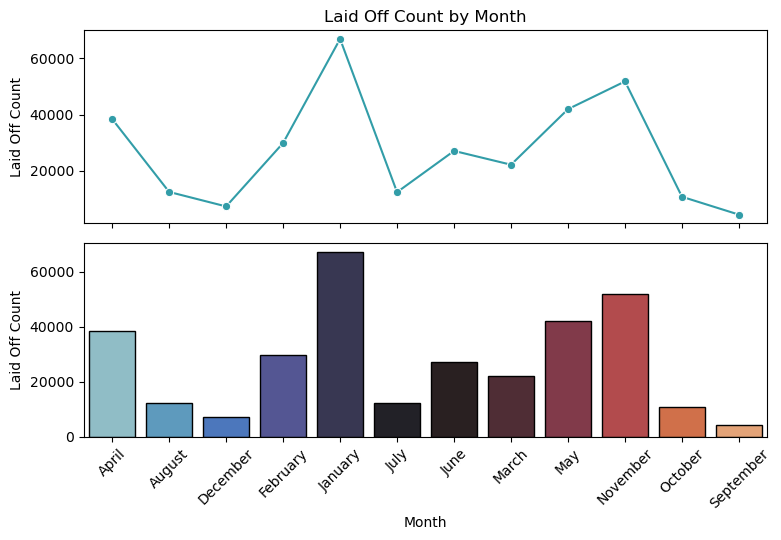

In [25]:
fig, ax = plt.subplots(2,1, sharex=True, figsize=(8,5))
ax[0] = sns.lineplot(data=df1.groupby('Month')['Laid_Off_Count'].sum().reset_index(), x='Month', y='Laid_Off_Count', 
                  errorbar=None, marker='o', ax=ax[0], color='#329da8', )
ax[0].set(title='Laid Off Count by Month', ylabel='Laid Off Count')

ax[1] = sns.barplot(data=df1.groupby('Month')['Laid_Off_Count'].sum().reset_index(), x='Month', y='Laid_Off_Count', 
                  errorbar=None, ax=ax[1], palette='icefire', linewidth=1,edgecolor='black')
ax[1].set(ylabel='Laid Off Count')

plt.tight_layout()
plt.xticks(rotation=45)

fig.show()

### 4. Laid Off Quarter vs Employees Laid Off Count

In [26]:
top_layoffs_quarters = df1.groupby(by="Quarters")["Laid_Off_Count"].sum().sort_values(ascending=False).head(10).reset_index()
top_layoffs_quarters

,Quarters,Laid_Off_Count
0,2023Q1,102835.0
1,2022Q4,66279.0
2,2020Q2,48910.0
3,2023Q2,28112.0
4,2022Q2,27727.0
5,2022Q3,24477.0
6,2022Q1,7979.0
7,2020Q1,7241.0
8,2020Q3,4390.0
9,2021Q4,2970.0


[Text(0.5, 0, 'Laid_Off_Count'), Text(0, 0.5, 'LayOff Quarters')]

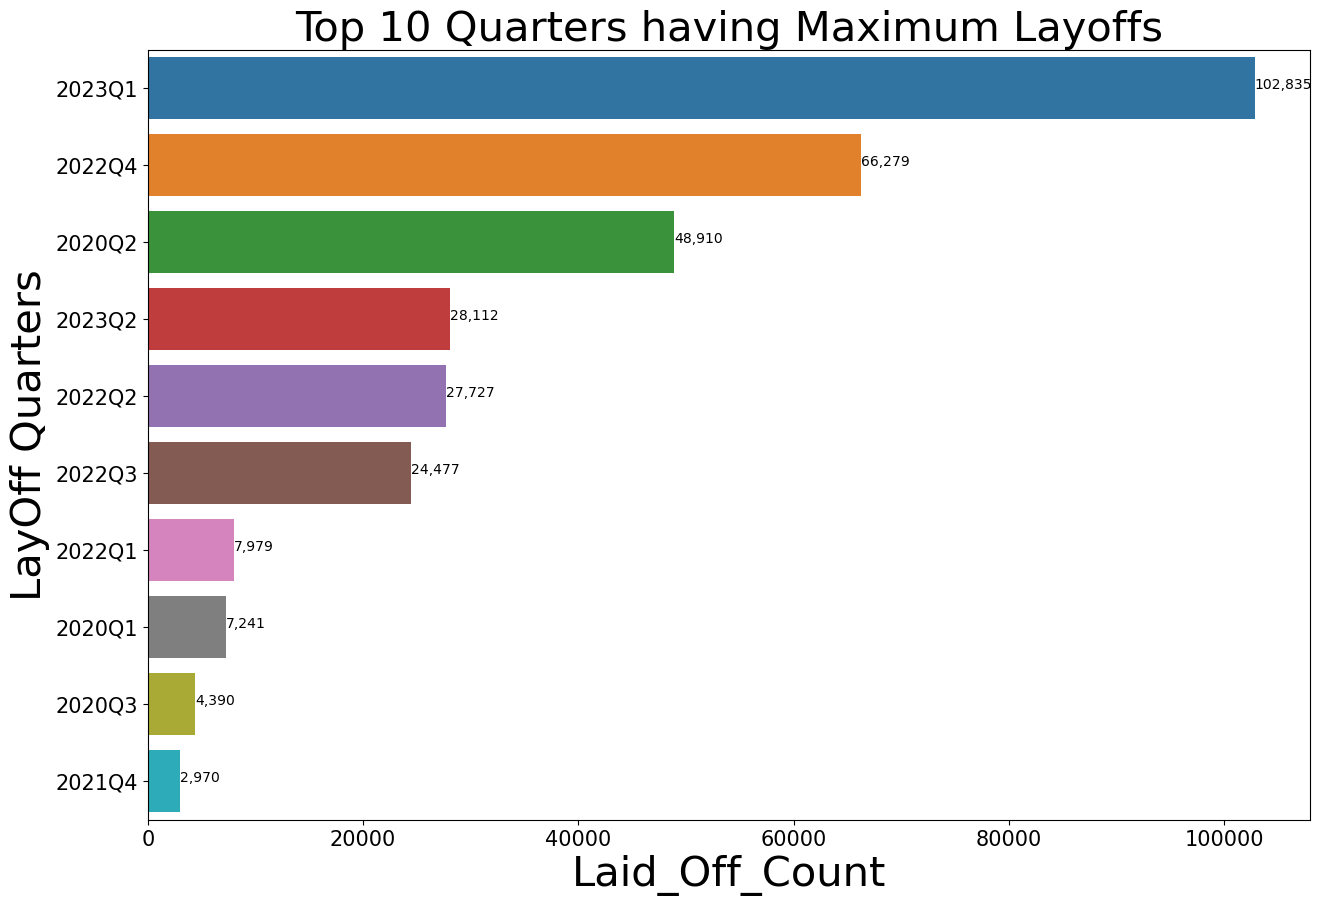

In [27]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Laid Off Count",fontsize=30)
plt.ylabel("LayOff Quarters",fontsize=30)
plt.title("Top 10 Quarters having Maximum Layoffs",fontsize=30)
ax = sns.barplot(x=top_layoffs_quarters.Laid_Off_Count, y=top_layoffs_quarters.Quarters)
for i, (value,name) in enumerate(zip(top_layoffs_quarters.Laid_Off_Count,top_layoffs_quarters.Quarters)):
  ax.text(value, i-.05,f'{value:,.0f}',size=10,ha="left",va="center")
ax.set(xlabel="Laid_Off_Count",ylabel="LayOff Quarters")

### 5. Top 10 Countries Showing Lay Offs 

In [28]:
import plotly.express as px

In [29]:
#Countries having most Layoffs Count
world = df1.groupby("Country")["Laid_Off_Count"].sum().reset_index()
df1['Country'].value_counts()

United States           810
India                    83
Canada                   67
Brazil                   46
Germany                  42
Israel                   40
United Kingdom           35
Australia                24
Singapore                19
Sweden                   11
Indonesia                 8
France                    5
United Arab Emirates      4
Ireland                   4
Kenya                     4
Nigeria                   4
Hong Kong                 3
Argentina                 3
China                     3
Estonia                   3
Mexico                    2
New Zealand               2
Norway                    2
Denmark                   2
Spain                     2
Chile                     2
Malaysia                  2
Switzerland               1
Netherlands               1
Seychelles                1
Russia                    1
Austria                   1
Finland                   1
South Korea               1
Senegal                   1
Thailand            

In [30]:
figure = px.choropleth(world,locations="Country",
                       locationmode = "country names", color="Laid_Off_Count",
                       hover_name="Country",range_color=[1,10000],
                       color_continuous_scale="reds",
                       title="Countries having LayOffs")
figure.show()

### 6. Top 10 Tech Giants Laid Off Employess  

In [31]:
import squarify 

In [32]:
sorted_df = df1.sort_values('Laid_Off_Count', ascending=False).head(10)

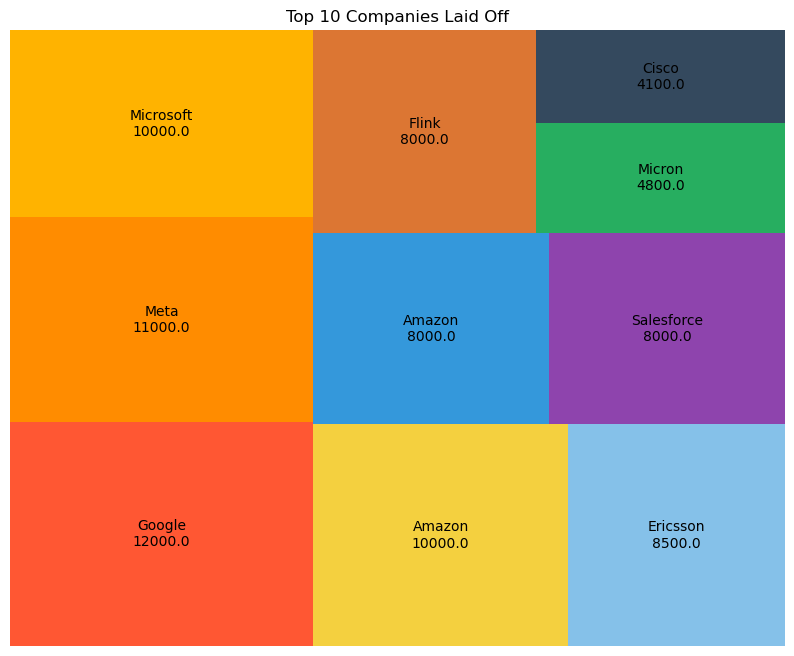

In [33]:
Companies = sorted_df["Company"].tolist()
Laid_off_count = sorted_df['Laid_Off_Count'].tolist()
colors = ['#FF5733', '#FF8C00', '#FFB300', '#F4D03F', '#85C1E9', '#3498DB', '#8E44AD', '#DC7633', '#27AE60', '#34495E']
sizes = [count / sum(Laid_off_count) for count in Laid_off_count]
labels = [f'{company}\n{laid_off_count}' for company, laid_off_count in zip(Companies, Laid_off_count)]
plt.figure(figsize=(10, 8))
squarify.plot(sizes=sizes,label = labels, color=colors)
plt.title('Top 10 Companies Laid Off')
plt.axis('off')
plt.show()

### 7. Lay Off Frequency as per Month and Year Wise Combinedly  

Excluding year 2023 from the dataset as few month data is available to visulaize

In [34]:
df_filtered_1 = df1[df1['Year'] != 2023]

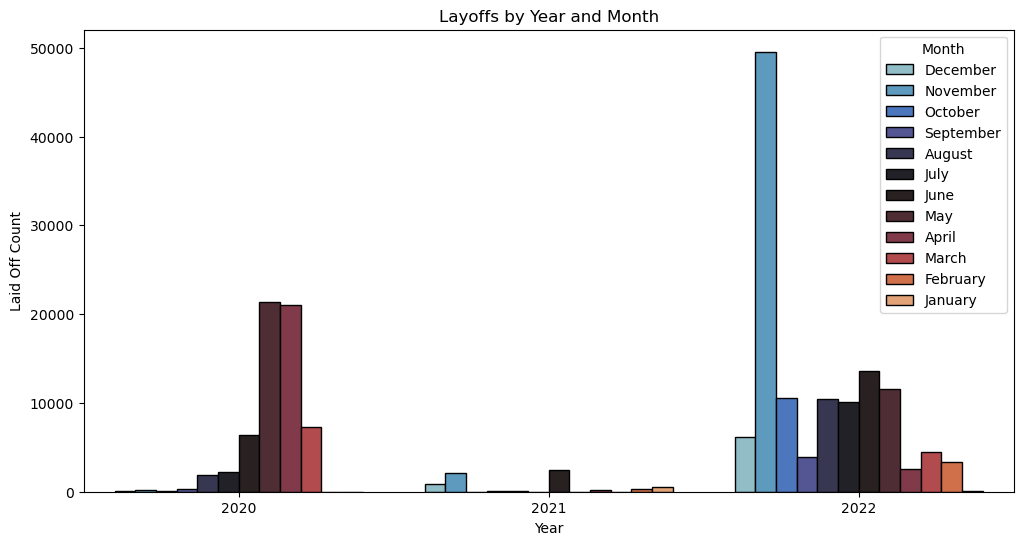

In [35]:
# Exclude year 2023 and and set frequencies of laid off count 
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.barplot(data=df_filtered_1, x='Year', y='Laid_Off_Count', hue='Month',estimator=sum, edgecolor='black', errorbar=None, ax = ax, palette='icefire')
ax.set(title='Layoffs by Year and Month', ylabel='Laid Off Count')
plt.show()

### 8. Observing Lay Off in Top 10 Regions in the World

In [36]:
df1["Location_HQ"].unique()


array(['Toronto', 'Singapore', 'Bengaluru', 'Los Angeles', 'SF Bay Area',
       'New York City', 'Raleigh', 'Sao Paulo', 'Washington D.C.',
       'Seattle', 'Phoenix', 'Melbourne', 'Baltimore', 'Stockholm',
       'Vancouver', 'Boston', 'Berlin', 'Chicago', 'Denver', 'Kfar Saba',
       'London', 'Santiago', 'Tel Aviv', 'Ottawa', 'Dallas', 'Sydney',
       'San Diego', 'Brisbane', 'Montreal', 'Paris', 'Cincinnati',
       'Madrid', 'Gurugram', 'Austin', 'Philadelphia', 'Nashua',
       'Chester', 'Dublin', 'Calgary', 'Auckland', 'Madison', 'Kitchener',
       'Minneapolis', 'Wellington', 'Pune', 'Seoul', 'Boise', 'Jakarta',
       'Columbus', 'Tallinn', 'Atlanta', 'Mumbai', 'Portland',
       'Frankfurt', 'Barcelona', 'Karlsruhe', 'Walldorf', 'Kiel',
       'Oxford', 'Boulder', 'Wilmington', 'Tokyo', 'Salt Lake City',
       'Nashville', 'Beijing', 'Reno', 'Hamburg', 'Munich', 'Kansas City',
       'Waterloo', 'Burlington', 'Miami', 'Sacramento', 'Buenos Aires',
       'Lagos', 'Duba

In [37]:
top_layoffs_region = df1.groupby(by="Location_HQ")["Laid_Off_Count"].sum().sort_values(ascending=False).head(10).reset_index()
top_layoffs_region

,Location_HQ,Laid_Off_Count
0,SF Bay Area,118984.0
1,Seattle,34342.0
2,New York City,22980.0
3,Bengaluru,15771.0
4,Berlin,11380.0
5,Stockholm,10735.0
6,Boston,9543.0
7,Boise,7200.0
8,Los Angeles,5988.0
9,Sao Paulo,5888.0


[Text(0.5, 0, 'Laid_Off_Count'), Text(0, 0.5, 'Location_HQ')]

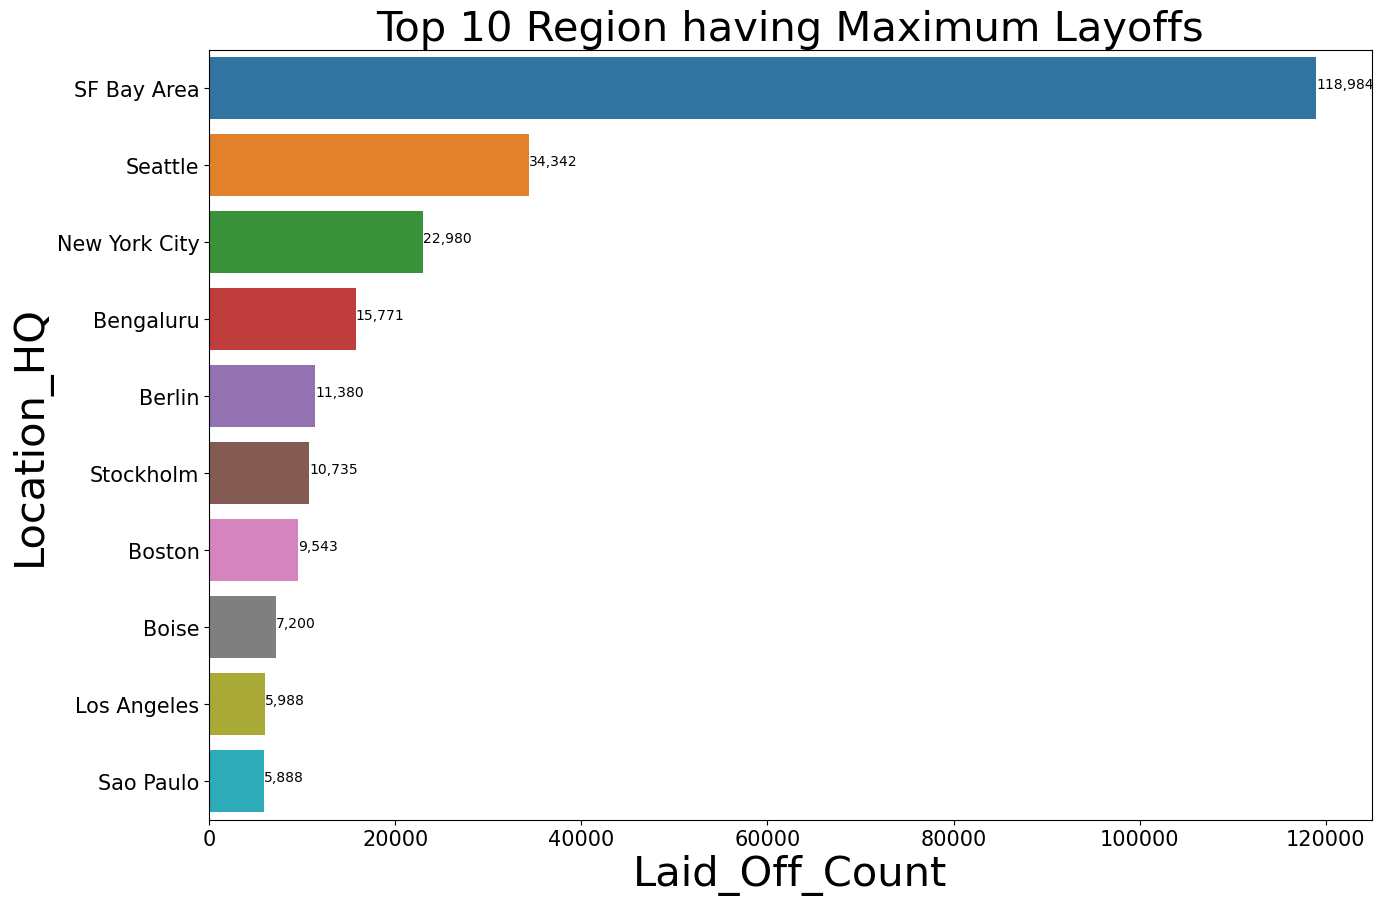

In [38]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Laid Off Count",fontsize=30)
plt.ylabel("Location HeadQuaters",fontsize=30)
plt.title("Top 10 Region having Maximum Layoffs",fontsize=30)
ax = sns.barplot(x=top_layoffs_region.Laid_Off_Count, y=top_layoffs_region.Location_HQ)
for i, (value,name) in enumerate(zip(top_layoffs_region.Laid_Off_Count,top_layoffs_region.Location_HQ)):
  ax.text(value, i-.05,f'{value:,.0f}',size=10,ha="left",va="center")
ax.set(xlabel="Laid_Off_Count",ylabel="Location_HQ")

### 9. Layoffs in White collar Jobs Industry and Blue Collar Jobs Industry 

In [39]:
df1["Industry"].unique()

array(['Food', 'Transportation', 'Media', 'Healthcare', 'Crypto',
       'Consumer', 'Product', 'Education', 'Security', 'Sales',
       'Infrastructure', 'Marketing', 'Support', 'Recruiting', 'Other',
       'Finance', 'Logistics', 'Hardware', 'Retail', 'Travel', 'Data',
       'HR', 'Real Estate', 'Energy', 'Fitness', 'Legal', 'Manufacturing',
       'Construction', 'Aerospace'], dtype=object)

In [40]:
white_collar_jobs_industry = ['Media','Sales','Marketing','Finance','Data','HR']
white_collar_jobs_industry_1 = df1[df1['Industry'].isin(white_collar_jobs_industry)]

In [41]:
white_collar_jobs = white_collar_jobs_industry_1.groupby(by="Industry")["Laid_Off_Count"].sum().sort_values(ascending=False).head(5).reset_index()
white_collar_jobs

,Industry,Laid_Off_Count
0,Finance,23947.0
1,Sales,12941.0
2,Marketing,7106.0
3,HR,4792.0
4,Media,4230.0


[Text(0.5, 0, 'Laid_Off_Count'), Text(0, 0.5, 'Industry')]

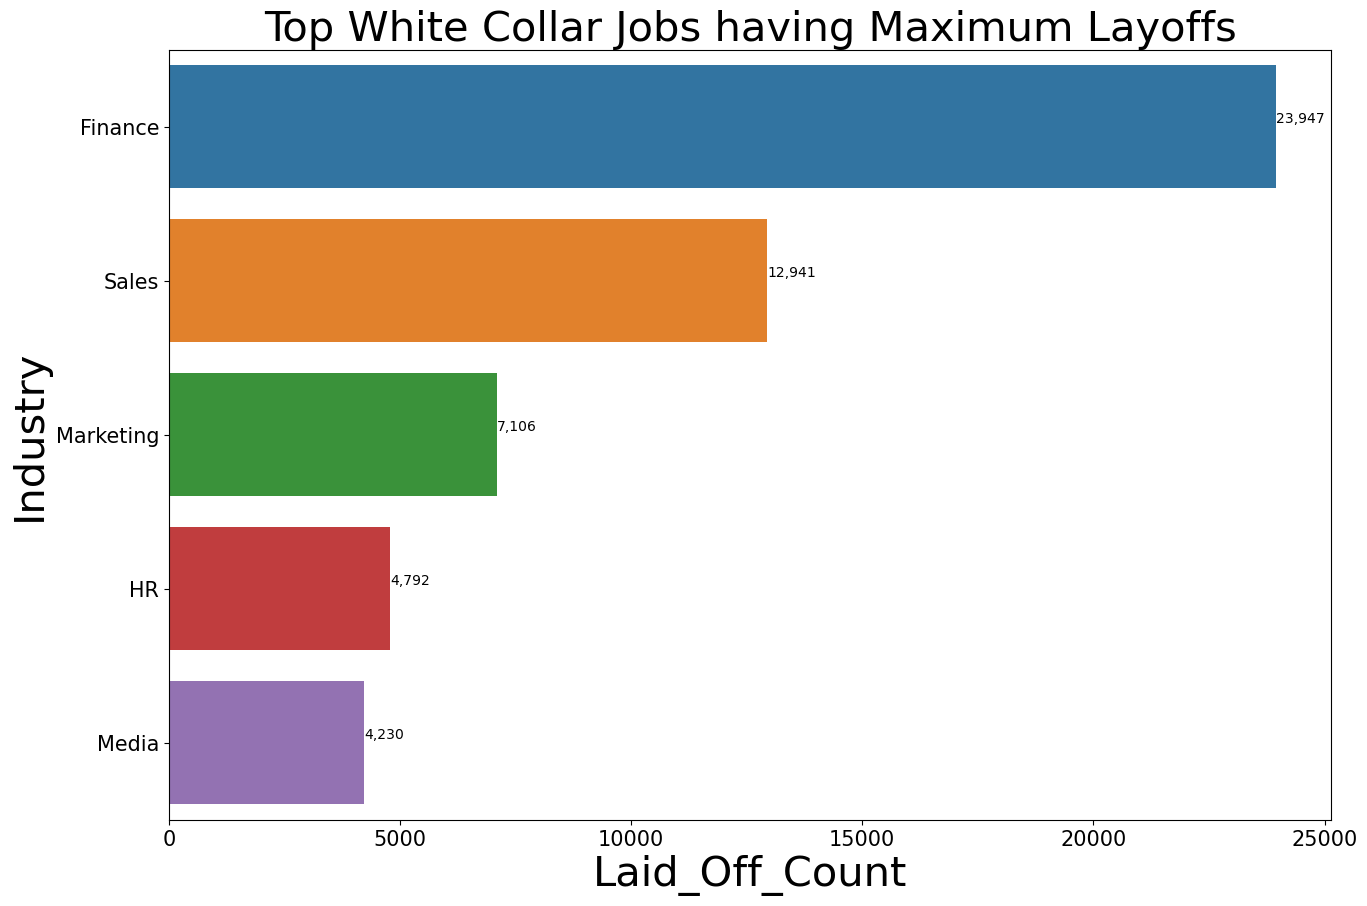

In [42]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Laid Off Count",fontsize=30)
plt.ylabel("Laid Off Industry",fontsize=30)
plt.title("Top White Collar Jobs having Maximum Layoffs",fontsize=30)
ax = sns.barplot(x=white_collar_jobs.Laid_Off_Count, y=white_collar_jobs.Industry)
for i, (value,name) in enumerate(zip(white_collar_jobs.Laid_Off_Count,white_collar_jobs.Industry)):
  ax.text(value, i-.05,f'{value:,.0f}',size=10,ha="left",va="center")
ax.set(xlabel="Laid_Off_Count",ylabel="Industry")

In [43]:
Blue_collar_jobs_industry = ['Transportation','Infrastructure','Logistics','Energy','Manufacturing','Construction']

In [44]:
Blue_collar_jobs_1 = df1[df1['Industry'].isin(Blue_collar_jobs_industry)]

In [45]:
Blue_collar_jobs = Blue_collar_jobs_1.groupby(by="Industry")["Laid_Off_Count"].sum().sort_values(ascending=False).head(5).reset_index()
Blue_collar_jobs

,Industry,Laid_Off_Count
0,Transportation,32301.0
1,Infrastructure,5580.0
2,Construction,3703.0
3,Logistics,3576.0
4,Energy,207.0


[Text(0.5, 0, 'Laid_Off_Count'), Text(0, 0.5, 'Industry')]

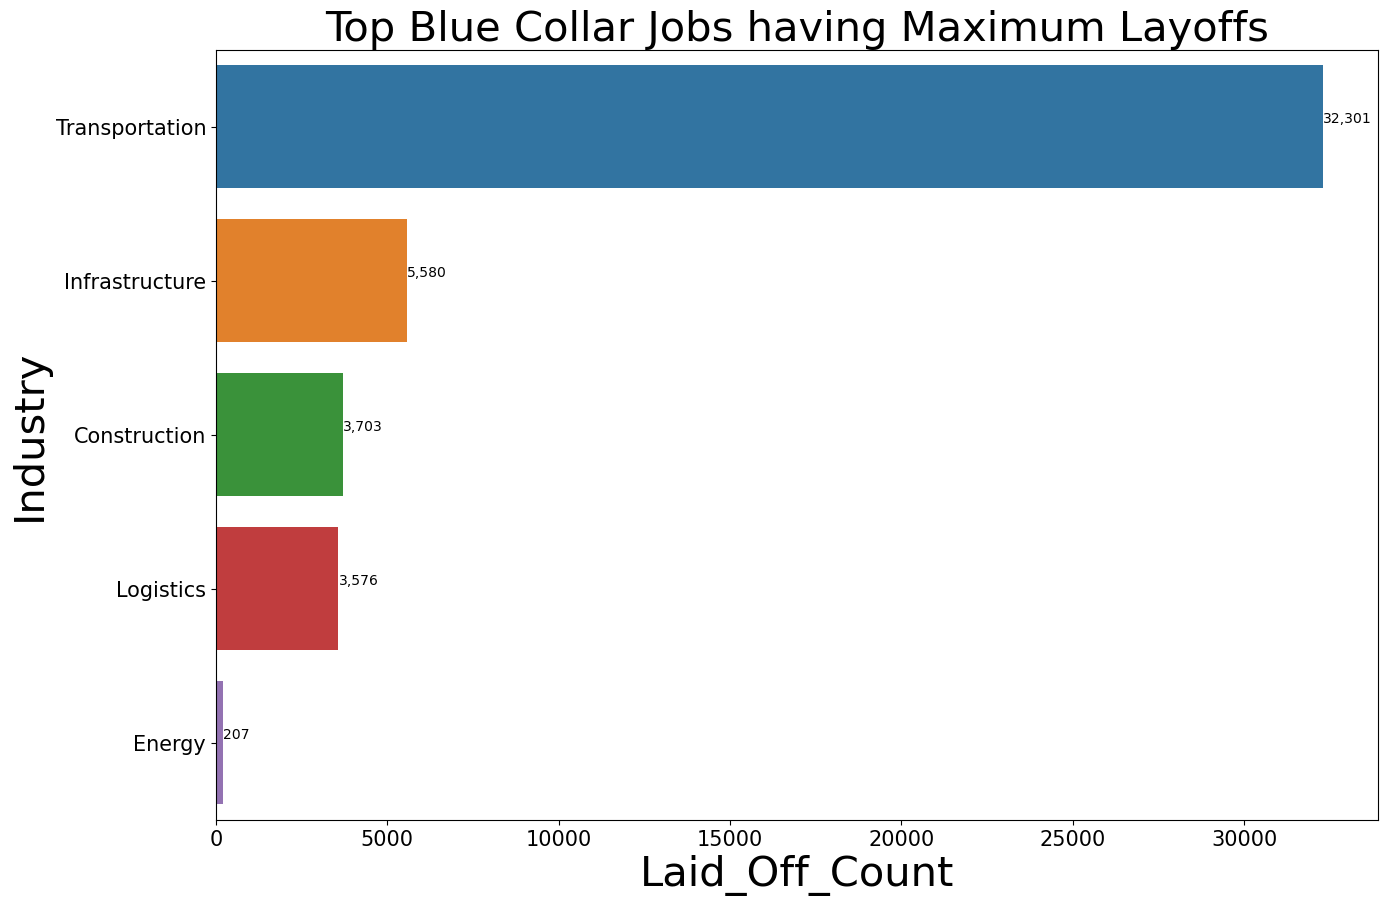

In [46]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Laid Off Count",fontsize=30)
plt.ylabel("Laid Off Industry",fontsize=30)
plt.title("Top Blue Collar Jobs having Maximum Layoffs",fontsize=30)
ax = sns.barplot(x=Blue_collar_jobs.Laid_Off_Count, y=Blue_collar_jobs.Industry)
for i, (value,name) in enumerate(zip(Blue_collar_jobs.Laid_Off_Count,Blue_collar_jobs.Industry)):
  ax.text(value, i-.05,f'{value:,.0f}',size=10,ha="left",va="center")
ax.set(xlabel="Laid_Off_Count",ylabel="Industry")

### 10. Multiple occurence of layoffs in the series of years 

In [47]:
unique_counts = df1['Company'].value_counts().head(5)
values_occured_greater_than_one = unique_counts[unique_counts > 3].index
filtered_df = df1[df1['Company'].isin(values_occured_greater_than_one)]

In [48]:
aggregated_data = filtered_df.groupby('Company')['Laid_Off_Count'].sum().sort_values(ascending=False).reset_index()

In [49]:
aggregated_data

,Company,Laid_Off_Count
0,Uber,7525.0
1,Lyft,2814.0
2,Swiggy,2080.0
3,Redfin,1769.0
4,Loft,1083.0


[Text(0.5, 0, 'Laid_Off_Count'), Text(0, 0.5, 'Company')]

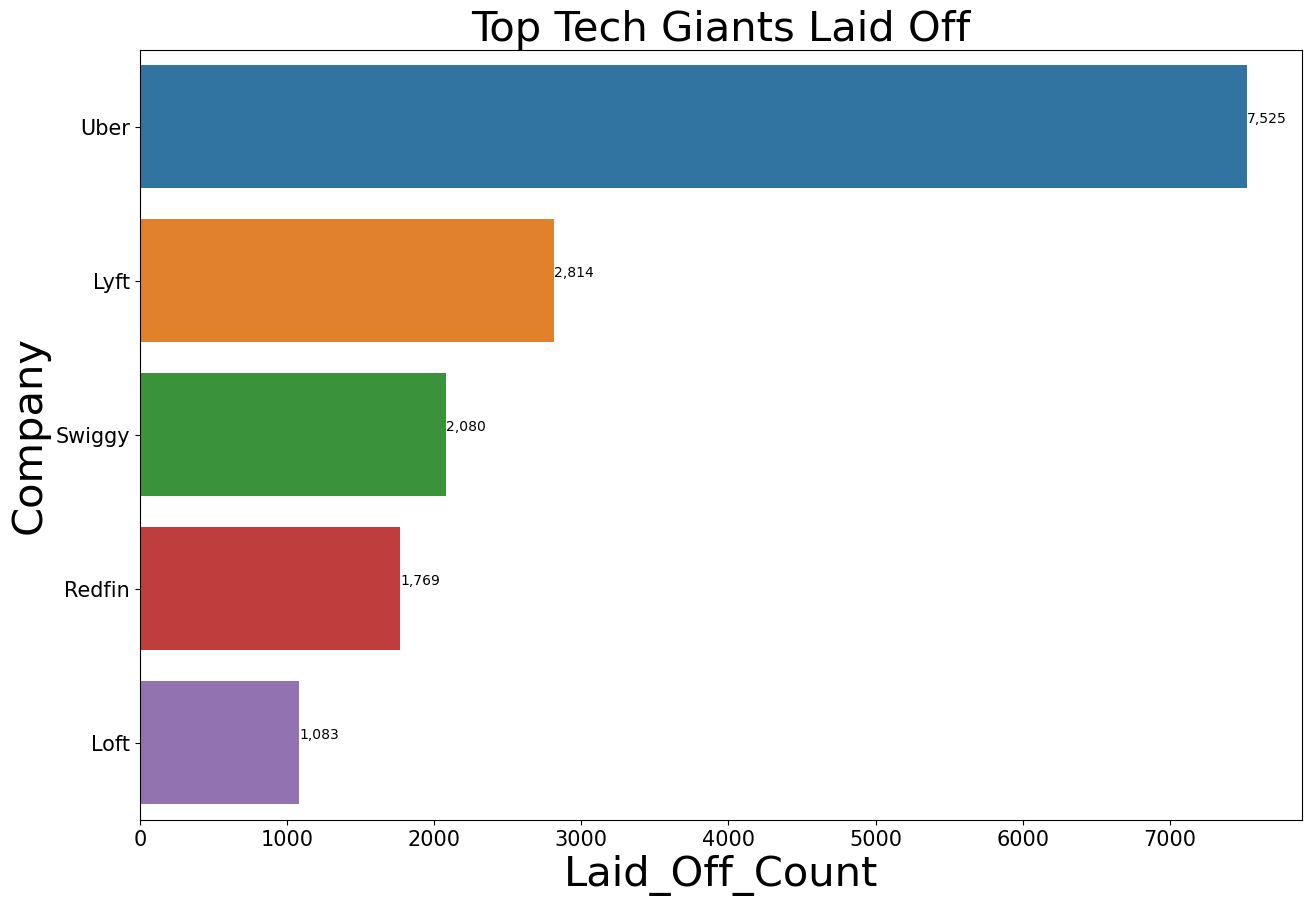

In [50]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Laid Off Count",fontsize=30)
plt.ylabel("Laid Off Company",fontsize=30)
plt.title("Top Tech Giants Laid Off",fontsize=30)
ax = sns.barplot(x=aggregated_data.Laid_Off_Count, y=aggregated_data.Company)
for i, (value,name) in enumerate(zip(aggregated_data.Laid_Off_Count,aggregated_data.Company)):
  ax.text(value, i-.05,f'{value:,.0f}',size=10,ha="left",va="center")
ax.set(xlabel="Laid_Off_Count",ylabel="Company")

### 11.Stages of Compannies which showed Layoffs more than one time 

In [51]:
sliced_df = df1.sort_values(by='Laid_Off_Count', ascending=False).head(5)
sliced_df

,index,Company,Location_HQ,Industry,Percentage,Date,Funds_Raised,Stage,Country,Laid_Off_Count,strength,Year,Month,Quarters
255,651,Google,SF Bay Area,Consumer,0.06,2023-01-20,26.0,Post-IPO,United States,12000.0,20000000.0,2023,January,2023Q1
449,1126,Meta,SF Bay Area,Consumer,0.13,2022-11-09,26000.0,Post-IPO,United States,11000.0,8461538.0,2022,November,2022Q4
265,684,Microsoft,Seattle,Other,0.05,2023-01-18,1.0,Post-IPO,United States,10000.0,20000000.0,2023,January,2023Q1
419,1058,Amazon,Seattle,Retail,0.03,2022-11-16,108.0,Post-IPO,United States,10000.0,33333333.0,2022,November,2022Q4
160,397,Ericsson,Stockholm,Other,0.08,2023-02-24,663.0,Post-IPO,Sweden,8500.0,10625000.0,2023,February,2023Q1


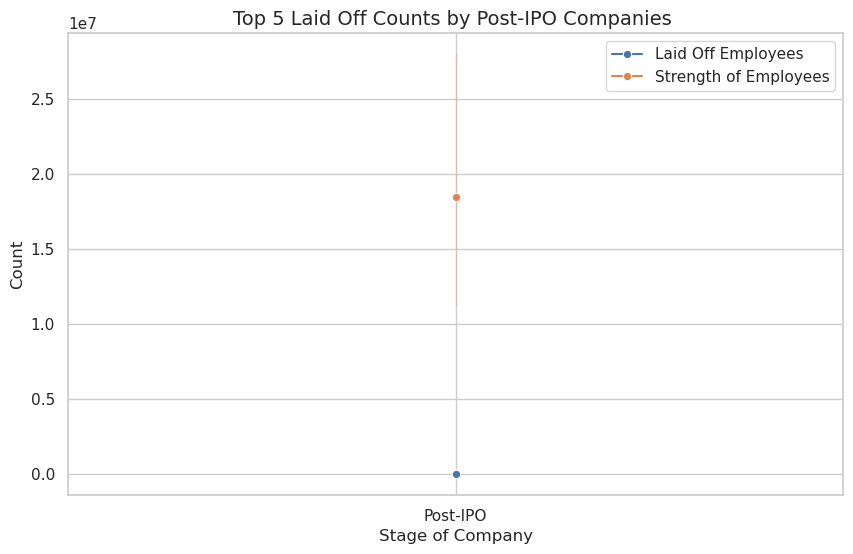

In [52]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='Stage', y='Laid_Off_Count', data= sliced_df, marker='o', label='Laid Off Employees')
sns.lineplot(x='Stage', y='strength', data= sliced_df, marker='o', label='Strength of Employees')
plt.xlabel('Stage of Company', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Top 5 Laid Off Counts by Post-IPO Companies ', fontsize=14)
plt.legend()
plt.show()

In [53]:
df1

,index,Company,Location_HQ,Industry,Percentage,Date,Funds_Raised,Stage,Country,Laid_Off_Count,strength,Year,Month,Quarters
0,5,Ritual,Toronto,Food,0.40,2023-06-21,134.0,Series C,Canada,38.0,9500.0,2023,June,2023Q2
1,7,Grab,Singapore,Transportation,0.11,2023-06-20,16500.0,Post-IPO,Singapore,1000.0,909091.0,2023,June,2023Q2
2,10,Chigari,Bengaluru,Media,0.20,2023-06-19,88.0,Unknown,India,48.0,24000.0,2023,June,2023Q2
3,13,Mojocare,Bengaluru,Healthcare,0.80,2023-06-17,24.0,Series A,India,170.0,21250.0,2023,June,2023Q2
4,17,CareRev,Los Angeles,Healthcare,0.33,2023-06-15,51.0,Series A,United States,100.0,30303.0,2023,June,2023Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237,2731,Inspirato,Denver,Travel,0.22,2020-03-16,79.0,Series C,United States,130.0,59091.0,2020,March,2020Q1
1238,2732,Help.com,Austin,Support,1.00,2020-03-16,6.0,Seed,United States,16.0,1600.0,2020,March,2020Q1
1239,2734,HopSkipDrive,Los Angeles,Transportation,0.10,2020-03-13,45.0,Unknown,United States,8.0,8000.0,2020,March,2020Q1
1240,2735,Panda Squad,SF Bay Area,Consumer,0.75,2020-03-13,1.0,Seed,United States,6.0,800.0,2020,March,2020Q1


In [54]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [55]:
from prophet import Prophet

In [56]:
import os
os

<module 'os' from '/opt/conda/lib/python3.10/os.py'>

In [57]:
total_laid_off_count = df1.groupby('Date')['Laid_Off_Count'].sum().reset_index()
total_laid_off_count

,Date,Laid_Off_Count
0,2020-03-12,20.0
1,2020-03-13,14.0
2,2020-03-16,146.0
3,2020-03-18,4.0
4,2020-03-19,50.0
...,...,...
417,2023-06-15,100.0
418,2023-06-17,170.0
419,2023-06-19,48.0
420,2023-06-20,1000.0


In [58]:
total_laid_off_count.columns=['ds','y']
total_laid_off_count ['ds']=pd.to_datetime(total_laid_off_count['ds'])

In [59]:
sample_data = total_laid_off_count.tail(120)
sample_data

,ds,y
302,2022-12-15,410.0
303,2022-12-16,54.0
304,2022-12-19,18.0
305,2022-12-20,91.0
306,2022-12-21,350.0
...,...,...
417,2023-06-15,100.0
418,2023-06-17,170.0
419,2023-06-19,48.0
420,2023-06-20,1000.0


In [60]:
m=Prophet(interval_width=0.95)
m.fit(sample_data)
future=m.make_future_dataframe(periods=20)
future.tail(20)

05:42:54 - cmdstanpy - INFO - Chain [1] start processing
05:42:55 - cmdstanpy - INFO - Chain [1] done processing


,ds
120,2023-06-22
121,2023-06-23
122,2023-06-24
123,2023-06-25
124,2023-06-26
125,2023-06-27
126,2023-06-28
127,2023-06-29
128,2023-06-30
129,2023-07-01


In [61]:
forecast = m.predict(future)
forecast.tail(20)
forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
135,2023-07-07,198.245596,-4279.139300,4770.595612
136,2023-07-08,-986.497645,-5486.726046,3373.323849
137,2023-07-09,-716.570286,-5197.603696,3697.587988
138,2023-07-10,-358.743514,-4831.936040,3733.966205
139,2023-07-11,-583.501811,-4976.555689,3905.026037


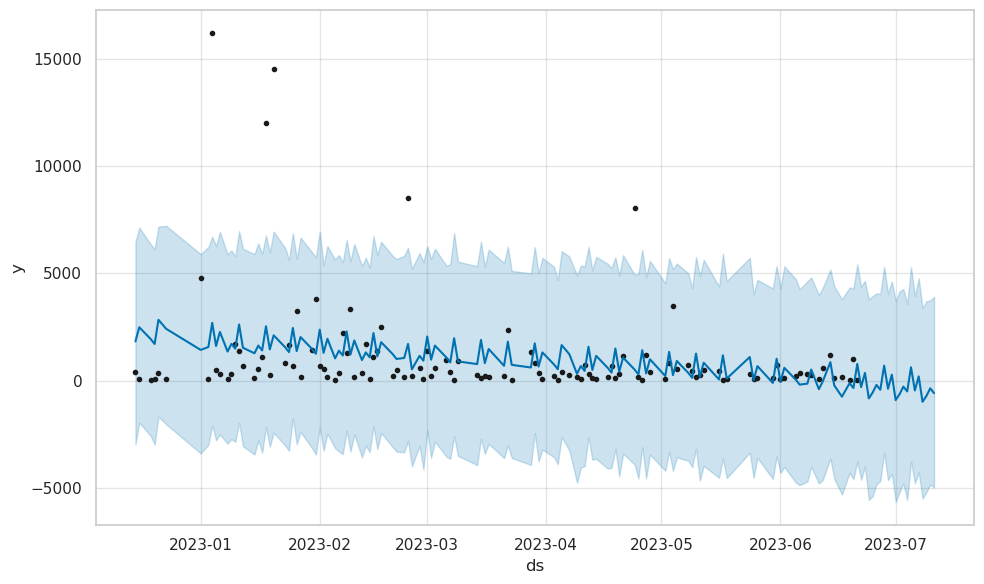

In [62]:
Predicted_layoffs_count = m.plot(forecast)

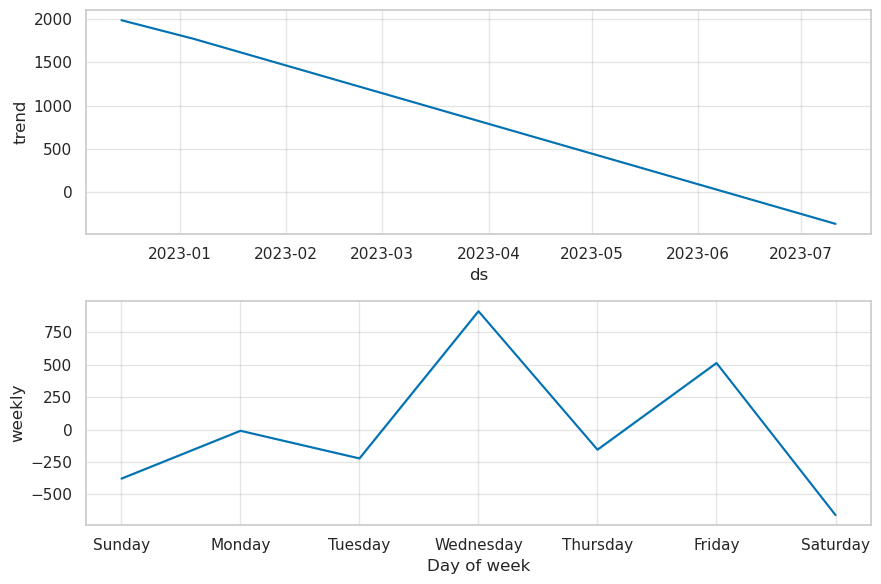

In [63]:
confirmed_forecast_plot1 = m.plot_components(forecast)

# Conclusion & Interpretation from Data
## These insights and interpretations stem from the conducted analysis above. For visual reference, please consult the accompanying graph 

### 1.Retail industry experienced the highest layoffs, while travel industry had the least.
### 2.In 2022, a significant peak in layoffs was observed, and this trend continued to increase in 2023, as demonstrated by the graphical representation.
### 3.In January, the highest number of layoffs were recorded, which aligns with the common practice of companies conducting financial year closing and settlements during this period.
### 4.The second quarter of 2021 witnessed the highest layoffs attributed to the impact of the COVID-19 second wave.
### 5.The United States of America reported the highest number of layoffs, exceeding 0.2 million, while India recorded the second-highest count, with less than 50,000 layoffs.
### 6.The San Francisco Bay Area had the highest number of companies with maximum layoffs.
### 7.The majority of layoffs, approximately 24,000, were observed in white-collar jobs, particularly within finance-based or fintech companies.
### 8.In contrast to white-collar jobs, blue-collar jobs, specifically in the transportation sector, were significantly impacted by layoffs, amounting to approximately 32,000.
### 10.Tech giant Uber experienced multiple layoffs throughout the years 2020 to 2023, totaling over 7,000 job reductions, four times within this period.
### 11.Following their IPOs, the majority of companies from the United States experienced layoffs, particularly after the COVID-19 pandemic. Notably, both Google and Microsoft reported similar levels of workforce reductions.
### 12. Forecasting indicates a continuous decrease in layoffs over the next 20 days, coinciding with the company's halt on layoffs and the commencement of new hiring. Additionally, Wednesdays stand out as critical days, potentially witnessing layoff events.




